# **Wine Dataset Analysis**

"""
This script demonstrates two machine learning approaches using the Wine dataset:

**Linear Regression**: Predicting a chemical property (alcohol content).

**Logistic Regression**: Classifying wine into three categories based on its chemical properties.

The code includes data preprocessing, model training, evaluation, and visualizations.
"""

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Wine Dataset

In [2]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

### Understand the Dataset.
Check basic details.

In [3]:
# Convert to DataFrame for better readability
wine_df = pd.DataFrame(X, columns=feature_names)

if X.shape[1] != len(feature_names):
    raise ValueError("Mismatch between data dimensions and feature names.")

wine_df['target'] = y

# Print Head and Tail of Dataset
print("\n--- Head of the Dataset ---")
print(wine_df.head())
print("\n--- Tail of the Dataset ---")
print(wine_df.tail())


--- Head of the Dataset ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  

**alcohol**: The alcohol content of the wine. This is a primary factor in wine classification, affecting taste, preservation, and quality.

**malic_acid:** The concentration of malic acid in the wine. This compound contributes to the tart taste of wine and its overall acidity.

**ash:** The total ash content in the wine. This measures the mineral content remaining after combustion and provides insights into wine's physical and chemical properties.

**alcalinity_of_ash:** A measure of the alkalinity of ash, which relates to the buffering capacity of the wine. It provides information about the mineral balance.

**magnesium**: The magnesium content in the wine, which can influence fermentation and stability.

**otal_phenols:**
The total amount of phenolic compounds in the wine. Phenols contribute to the flavor, astringency, and antioxidant properties of wine.

**flavanoids:** A specific type of phenolic compound important for the color, taste, and mouthfeel of the wine. Flavanoids are associated with higher-quality wines.

**nonflavanoid_phenols:** Phenolic compounds not classified as flavanoids. These contribute less directly to taste but still influence the wine's chemical profile.

**proanthocyanins:** Compounds that contribute to the bitterness and astringency of the wine. They are also involved in color stability.

**color_intensity:** A measure of the intensity of the wine's color, which is influenced by its phenolic content and aging process.

**hue:** The shade of the wine's color. This is another measure of the wine's visual characteristics, indicating its aging and quality.

**od280/od315_of_diluted_wines:** The ratio of absorbance at 280 nm and 315 nm. This is a measure of wine's phenolic content, particularly its tannins and other compounds affecting the taste.

**proline:** The concentration of proline, an amino acid. It is often used as an indicator of wine origin and quality.

**target:** The class label representing the type of wine (e.g., cultivars of grape). In this dataset, the values could be 0, 1, or 2, representing three distinct wine types.

In [4]:
print("wine_df describe: ")
print(f"{wine_df.describe()}\n")

wine_df describe: 
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359

# --- Linear Regression: Predicting a Chemical Property ---
**Objective**: Predict "alcohol" content based on other features

**Preprocessing for Linear Regression**



In [5]:
X_linear = X[:, 1:]  # Use all features except "alcohol" (index 0)
y_linear = X[:, 0]   # Use "alcohol" as the target

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
X_linear, y_linear, test_size=0.2, random_state=42
)

# Train Linear Regression Model

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)
y_pred_linear = linear_model.predict(X_test_linear)

# Plot 1: Actual vs Predicted (Linear Regression)

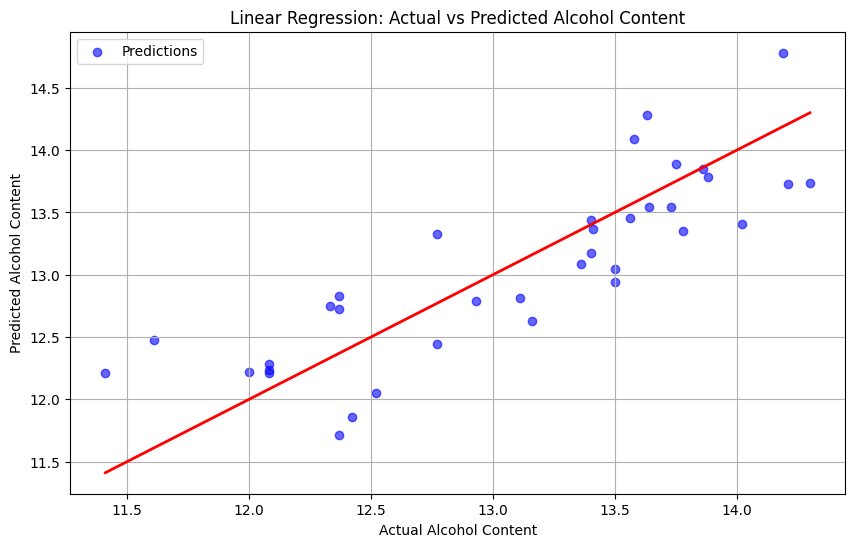

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, y_pred_linear, c='blue', alpha=0.6, label='Predictions')
plt.legend()
plt.plot(
[min(y_test_linear), max(y_test_linear)],
[min(y_test_linear), max(y_test_linear)],
color="red",
linewidth=2,
)


plt.title("Linear Regression: Actual vs Predicted Alcohol Content")
plt.xlabel("Actual Alcohol Content")
plt.ylabel("Predicted Alcohol Content")
plt.grid(True)
plt.show()

# Plot 2: Residual Plot (Linear Regression)

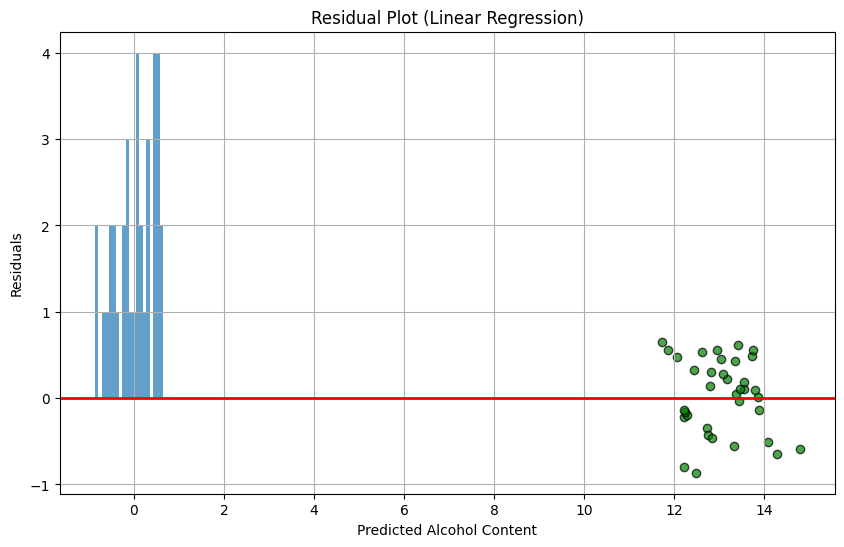

In [14]:
residuals = y_test_linear - y_pred_linear
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.7, label='Residual Distribution')
plt.scatter(y_pred_linear, residuals, color="green", alpha=0.7, edgecolor="k")
plt.axhline(0, color="red", linewidth=2)
plt.title("Residual Plot (Linear Regression)")
plt.xlabel("Predicted Alcohol Content")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# **--- Logistic Regression: Predicting Wine Class ---**

**Objective**: Classify wine into three classes based on features

**Preprocessing for Logistic Regression**

In [9]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model

In [10]:
logistic_model = LogisticRegression(max_iter=500)
logistic_model.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = logistic_model.predict(X_test_logistic)
y_proba_logistic = logistic_model.predict_proba(X_test_logistic)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Plot 3: Confusion Matrix (Logistic Regression)

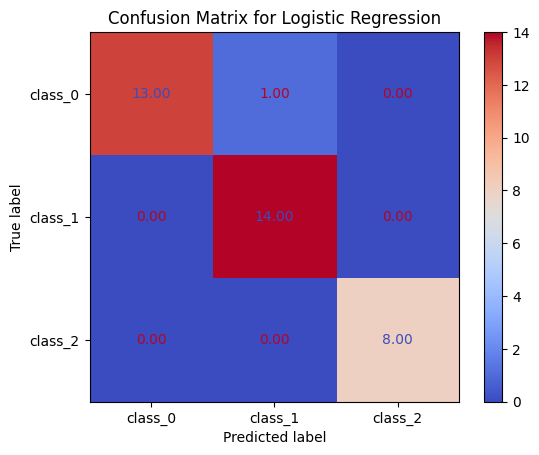

In [15]:
cm = confusion_matrix(y_test_logistic, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap="coolwarm", values_format=".2f")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Plot 4: Actual vs Predicted Classes (Logistic Regression)

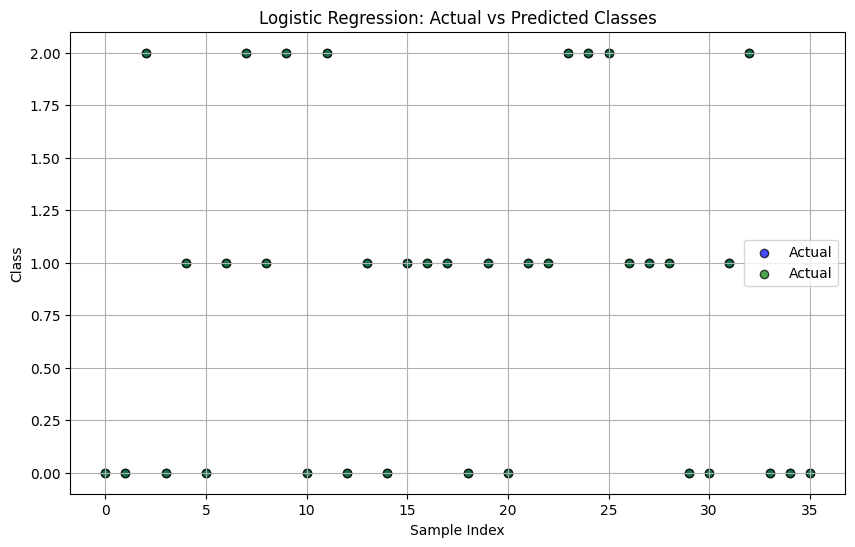

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(
range(len(y_test_logistic)),
y_test_logistic,
color="blue",
label="Actual",
alpha=0.7,
edgecolor="k",
)
plt.scatter(
    range(len(y_test_logistic)),
    y_test_logistic,
    c='green',
    alpha=0.7,
    label='Actual',
    edgecolor='k'
)
plt.title("Logistic Regression: Actual vs Predicted Classes")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.show()

# Plot 5: Probability Distribution for Logistic Regression Predictions



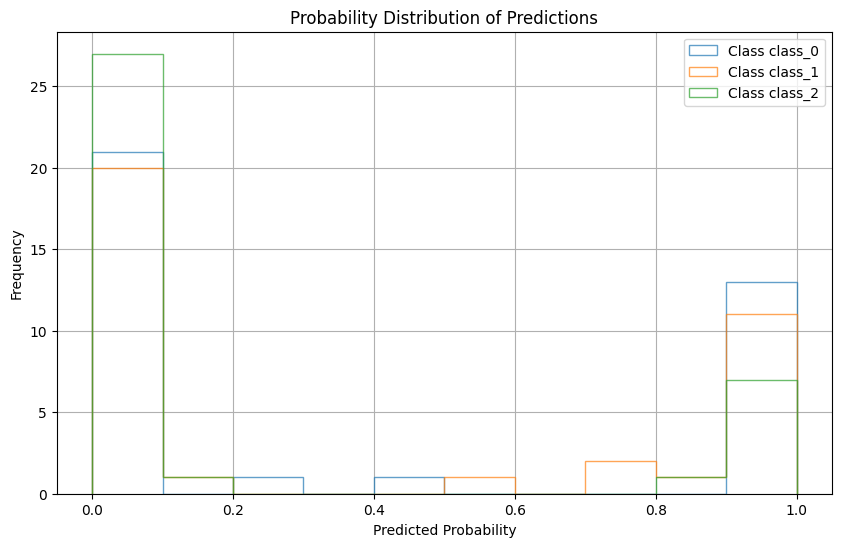

In [17]:
plt.figure(figsize=(10, 6))
for i in range(3):  # 3 classes in the Wine dataset
    plt.hist(
    y_proba_logistic[:, i],
    bins=10,
    alpha=0.7,
    histtype="step",
    label=f"Class {wine.target_names[i]}"
)
plt.title("Probability Distribution of Predictions")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()